<a href="https://colab.research.google.com/github/IvanGoyena/CURSO-DATA-SCIENCE/blob/main/Entrega/ProyectoDSParte1_IvanGoyena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto Final - Visualizaciones en Python - Ivan Goyena

# **Abstract ⚛**

El presente trabajo tiene como objetivo realizar un análisis exploratorio y visual del dataset "taco_sales_(2024-2025).csv", el cual contiene información detallada sobre ventas de tacos a lo largo de los años 2024 y 2025. El dataset incluye variables relacionadas con fechas, tipos de productos, precios, cantidades vendidas, y otros atributos asociados a la operación comercial de una taquería.

La motivación detrás de este análisis surge de la necesidad de comprender patrones de consumo, identificar productos estrella, evaluar comportamientos estacionales, y detectar posibles oportunidades de mejora en la estrategia de ventas.

A través de visualizaciones y análisis estadísticos, se busca responder a preguntas clave sobre las ventas, como la relación entre el tipo de taco y las ventas, así como las variaciones en las ventas a lo largo del tiempo.

Se espera proporcionar insights que no solo sean informativos, sino también prácticos para la toma de decisiones.

# **Preguntas e Hipotesis** ❓


¿Qué tipo de taco se vende más y qué factores influyen en su éxito?

¿Existen variaciones entre las franjas horarias en la cantidad de ventas?

¿El precio influye significativamente en la cantidad vendida de cada producto?

¿Cuáles son los días de mayor volumen de ventas?

¿Que estado es el que contiene mayor cantidad de ventas con respecto a los dias de la semana?

# **URL** del CSV

In [57]:
URL = 'https://raw.githubusercontent.com/IvanGoyena/ARCHIVOS-CSV/refs/heads/main/taco_sales_(2024-2025).csv'

# Importacion de liberarias y archivo CSV

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(URL)
df.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False


## Informacion del database

In [59]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order ID                 1000 non-null   int64  
 1   Restaurant Name          1000 non-null   object 
 2   Location                 1000 non-null   object 
 3   Order Time               1000 non-null   object 
 4   Delivery Time            1000 non-null   object 
 5   Delivery Duration (min)  1000 non-null   int64  
 6   Taco Size                1000 non-null   object 
 7   Taco Type                1000 non-null   object 
 8   Toppings Count           1000 non-null   int64  
 9   Distance (km)            1000 non-null   float64
 10  Price ($)                1000 non-null   float64
 11  Tip ($)                  1000 non-null   float64
 12  Weekend Order            1000 non-null   bool   
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 94.9+ KB


,Order ID,Delivery Duration (min),Toppings Count,Distance (km),Price ($),Tip ($)
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,552504.865000,50.93000,2.529000,13.073420,6.908250,1.806110
std,255948.779709,23.22754,1.717005,7.142268,2.310137,1.132035
min,101139.000000,10.00000,0.000000,0.510000,3.000000,0.010000
25%,331796.750000,30.00000,1.000000,6.972500,4.500000,0.907500
50%,559740.000000,53.00000,3.000000,13.200000,6.750000,1.760000
75%,771781.750000,71.00000,4.000000,19.242500,9.250000,2.520000
max,999138.000000,90.00000,5.000000,24.980000,10.750000,4.980000


# Transformaciones Realizadas ⛏

### Agregado columna Cantidad

In [60]:
df['Cantidad'] = 1

### Transformacion del campo "Order Time" al formato Fecha

In [61]:
df['Order Time'] = pd.to_datetime(df['Order Time'].astype(str), format="%d-%m-%Y %H:%M", errors='coerce')

### Separacion de fecha y hora y agregado de dia/mes

In [62]:
df["Fecha"] = df["Order Time"].dt.date
df["Hora"] = df["Order Time"].dt.hour
df["Mes"] = df["Order Time"].dt.month
df["Día de Semana"] = df["Order Time"].dt.day_name()

### Agregado columna "Franja Horaria"

In [63]:
def clasificar_hora(hora):
  if 6<= hora <12:
    return 'Mañana'
  elif 12 <= hora < 18:
    return 'Tarde'
  else:
    return 'Noche'

df["Franja Horaria"] = df["Hora"].apply(clasificar_hora)

### Agregado columna "Total" sumando el precio y la propina

In [64]:
df["Total"] = df["Price ($)"] + df["Tip ($)"]

### Categoria de Venta Alta o Baja segunda la Media

In [65]:
umbral = df["Total"].mean()
df["Venta Alta"] = np.where(df["Total"] >= umbral, "Sí", "No")

### Categorizacion de ventas por Dia de semana o fin de semana

In [66]:
df["Es Fin de Semana"] = df["Día de Semana"].isin(["Saturday", "Sunday"])

# Graficos y Visualizaciones 🌮

# Graficos Univariados

### Grafico de barras x Tipo de Taco

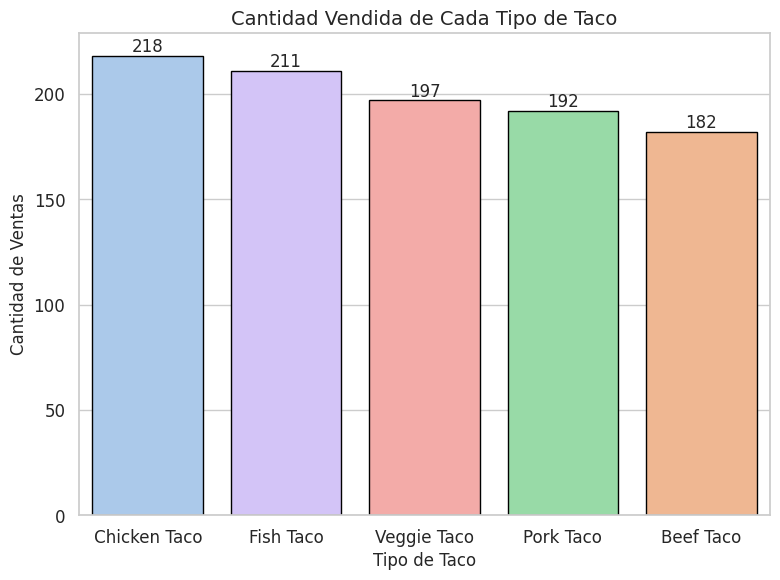

In [67]:
plt.figure(figsize=(8, 6))

order = df['Taco Type'].value_counts().index

sns.set_style("whitegrid")
ax = sns.countplot(
    x='Taco Type',
    data=df,
    order=order,
    hue='Taco Type',
    palette="pastel",
    edgecolor='black',
    legend=False
)
plt.title('Cantidad Vendida de Cada Tipo de Taco', fontsize=14)
plt.xlabel('Tipo de Taco', fontsize=12)
plt.ylabel('Cantidad de Ventas', fontsize=12)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()


In [68]:
# Agrupar por tipo de taco y calcular estadísticas del total vendido por orden
estadisticas_taco = df.groupby("Taco Type")["Total"].agg(
    Total_Promedio="mean",
    Total_Mediana="median",
    Total_Minimo="min",
    Total_Maximo="max",
    Total_DesvEst="std",
    Cantidad_Ordenes="count"
).round(2)

print("📊 Estadísticas del monto total por tipo de taco:")
print(estadisticas_taco)


📊 Estadísticas del monto total por tipo de taco:
              Total_Promedio  Total_Mediana  Total_Minimo  Total_Maximo  \
Taco Type                                                                 
Beef Taco               8.28           8.07          3.62         14.37   
Chicken Taco            9.02           9.32          3.16         15.08   
Fish Taco               8.69           8.56          3.19         15.43   
Pork Taco               8.90           9.09          3.21         15.47   
Veggie Taco             8.63           8.53          3.01         14.77   

              Total_DesvEst  Cantidad_Ordenes  
Taco Type                                      
Beef Taco              2.35               182  
Chicken Taco           2.76               218  
Fish Taco              2.65               211  
Pork Taco              2.78               192  
Veggie Taco            2.53               197  


#### Conclusion

Se analizó la variable categórica Taco Type para conocer la distribución de las ventas según los distintos tipos de tacos ofrecidos.

En este grafico podemos observar que el Tipo de Taco preponderante es el Chicken Taco, superando ampliamente al de menor venta que es el Beef Taco, pudiendo reforzar la venta con promociones sobre el mismo

## Histograma con KDE – Distribución de los Totales de Venta

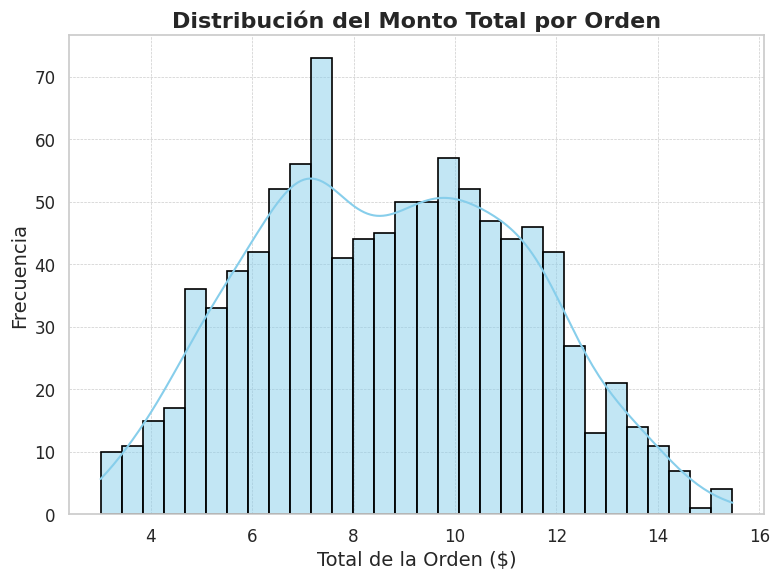

In [69]:
sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
sns.histplot(
    df['Total'],
    kde=True,
    bins=30,
    color='skyblue',
    edgecolor='black',
    linewidth=1.2
)

plt.title('Distribución del Monto Total por Orden', fontsize=16, fontweight='bold')
plt.xlabel('Total de la Orden ($)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)


plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()



In [70]:
media = df["Total"].mean()
mediana = df["Total"].median()
desvest = df["Total"].std()
maximo = df["Total"].max()
minimo = df["Total"].min()

print(f"📊 Estadísticas del monto total por orden:")
print(f"Media: ${media:.2f}")
print(f"Mediana: ${mediana:.2f}")
print(f"Desviación estándar: ${desvest:.2f}")
print(f"Máximo: ${maximo:.2f}")
print(f"Mínimo: ${minimo:.2f}")


📊 Estadísticas del monto total por orden:
Media: $8.71
Mediana: $8.67
Desviación estándar: $2.63
Máximo: $15.47
Mínimo: $3.01


#### Conclusiones

El histograma de la variable “Total” revela una distribución asimétrica a la derecha, la mayoría de las órdenes presentan montos bajos.
A medida que el monto total aumenta, la frecuencia disminuye notablemente, lo que indica que las órdenes de alto valor son menos frecuentes.

La curva KDE refuerza esta observación mostrando un pico claro en ese rango bajo, seguido de una caída progresiva.


## Total de ventas x Horario

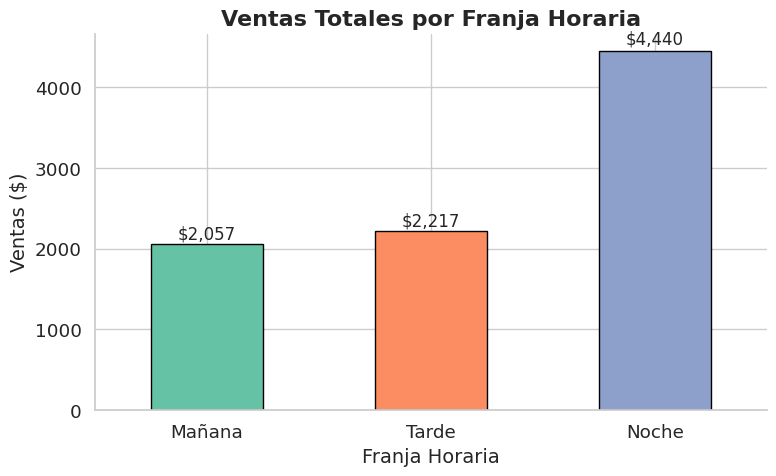

In [71]:
ventas_por_franja = df.groupby("Franja Horaria")["Total"].sum().reindex(["Mañana", "Tarde", "Noche"])

# Gráfico
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(8, 5))

ax = ventas_por_franja.plot(
    kind='bar',
    color=sns.color_palette("Set2"),
    edgecolor='black'
)

plt.title("Ventas Totales por Franja Horaria", fontsize=16, fontweight='bold')
plt.xlabel("Franja Horaria", fontsize=14)
plt.ylabel("Ventas ($)", fontsize=14)
plt.xticks(rotation=0)

# Anotar los valores en cada barra
for i, valor in enumerate(ventas_por_franja):
    ax.text(i, valor + valor*0.01, f"${valor:,.0f}", ha='center', va='bottom', fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()


In [72]:
estadisticas_total_franja = df.groupby("Franja Horaria")["Total"].agg(
    Total_Promedio="mean",
    Total_Mediana="median",
    Total_Minimo="min",
    Total_Maximo="max",
    Total_DesvEst="std",
    Cantidad_Ordenes="count"
).reindex(["Mañana", "Tarde", "Noche"]).round(2)

print("📊 Estadísticas de ventas ($) por franja horaria:")
print(estadisticas_total_franja)


📊 Estadísticas de ventas ($) por franja horaria:
                Total_Promedio  Total_Mediana  Total_Minimo  Total_Maximo  \
Franja Horaria                                                              
Mañana                    8.64           8.55          3.32         14.77   
Tarde                     9.01           9.27          3.38         15.47   
Noche                     8.61           8.44          3.01         15.43   

                Total_DesvEst  Cantidad_Ordenes  
Franja Horaria                                   
Mañana                   2.51               238  
Tarde                    2.76               246  
Noche                    2.62               516  


#### Conclusiones
A partir de los datos analizados, se observa que la franja horaria con mayor cantidad de órdenes es claramente la Noche, con 516 pedidos, el ***do***ble que Mañana 238 y Tarde 246.

Sin embargo, al analizar el promedio de ventas por orden, la Tarde se posiciona ligeramente por encima con 9.01, seguida por la Mañana 8.64 y la Noche 8.61.

Estos significa que aunque durante la noche se generan más ventas en cantidad, el ticket promedio por orden no es el más alto. En cambio, durante la tarde, aunque hay menos pedidos, estos tienden a ser ligeramente más costosos en promedio.

En cuanto a la variabilidad de los montos indica una distribución relativamente estable de los totales por orden.

# Graficos Bivariados

## Boxpot: Distribucion del total x tipo de taco

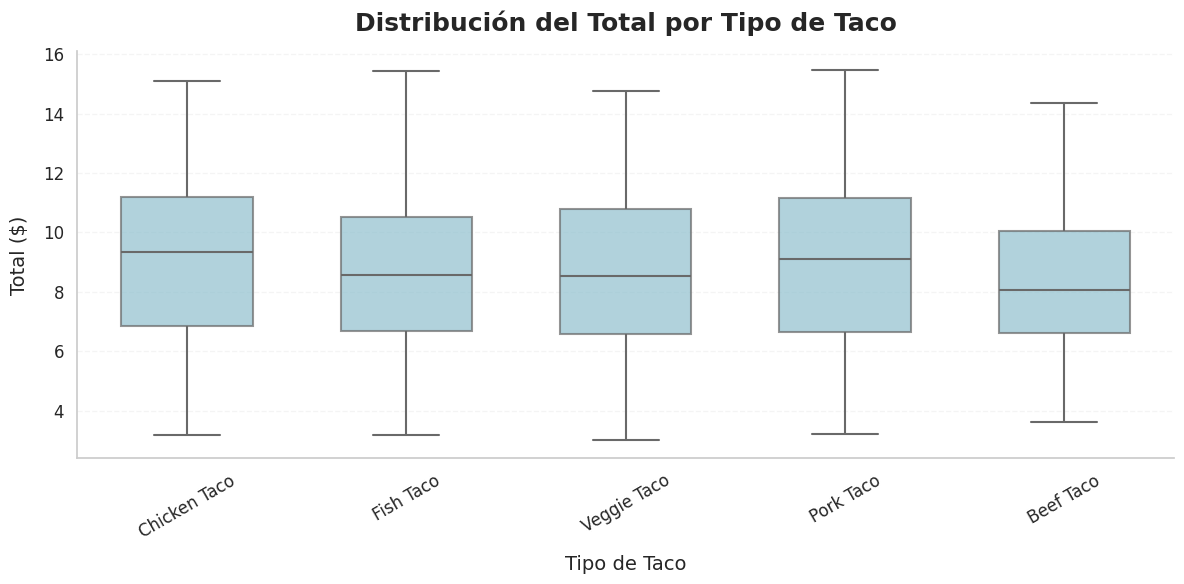

In [73]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

ax = sns.boxplot(
    data=df,
    x="Taco Type",
    y="Total",
    order=order,
    width=0.6,
    boxprops=dict(alpha=0.7),
    fliersize=3,
    linewidth=1.5,
    color="#86c5d8"
)

plt.title("Distribución del Total por Tipo de Taco", fontsize=18, fontweight='bold', pad=15)
plt.xlabel("Tipo de Taco", fontsize=14, labelpad=10)
plt.ylabel("Total ($)", fontsize=14, labelpad=10)

ax.tick_params(axis='x', labelrotation=30, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

sns.despine()

plt.grid(True, axis='y', linestyle='--', alpha=0.2)

plt.tight_layout()
plt.show()





In [74]:
stats = df.groupby('Taco Type')['Total'].describe()
print(stats[['min', '25%', '50%', '75%', 'max', 'std']])


               min     25%    50%      75%    max       std
Taco Type                                                  
Beef Taco     3.62  6.6025  8.070  10.0350  14.37  2.353986
Chicken Taco  3.16  6.8550  9.325  11.1800  15.08  2.756182
Fish Taco     3.19  6.6750  8.560  10.5000  15.43  2.648282
Pork Taco     3.21  6.6475  9.085  11.1475  15.47  2.783512
Veggie Taco   3.01  6.5900  8.530  10.7800  14.77  2.531171


#### Conlusiones

En el gráfico se puede ver cómo varían los montos totales según el tipo de taco. El Chicken Taco y el Pork Taco tienen los valores más altos en general, con medianas alrededor de los $9. El Beef, Fish y Veggie Taco están un poco por debajo, pero no hay grandes diferencias entre ellos.

Todos los tipos tienen algunos valores más extremos (outliers), lo que puede deberse a pedidos grandes o combinaciones con otros productos. En general, las ventas están bastante concentradas entre los $6 y los $11, con una variación moderada.

## Scatterplot: Relacion Precio y Total x tipo de taco

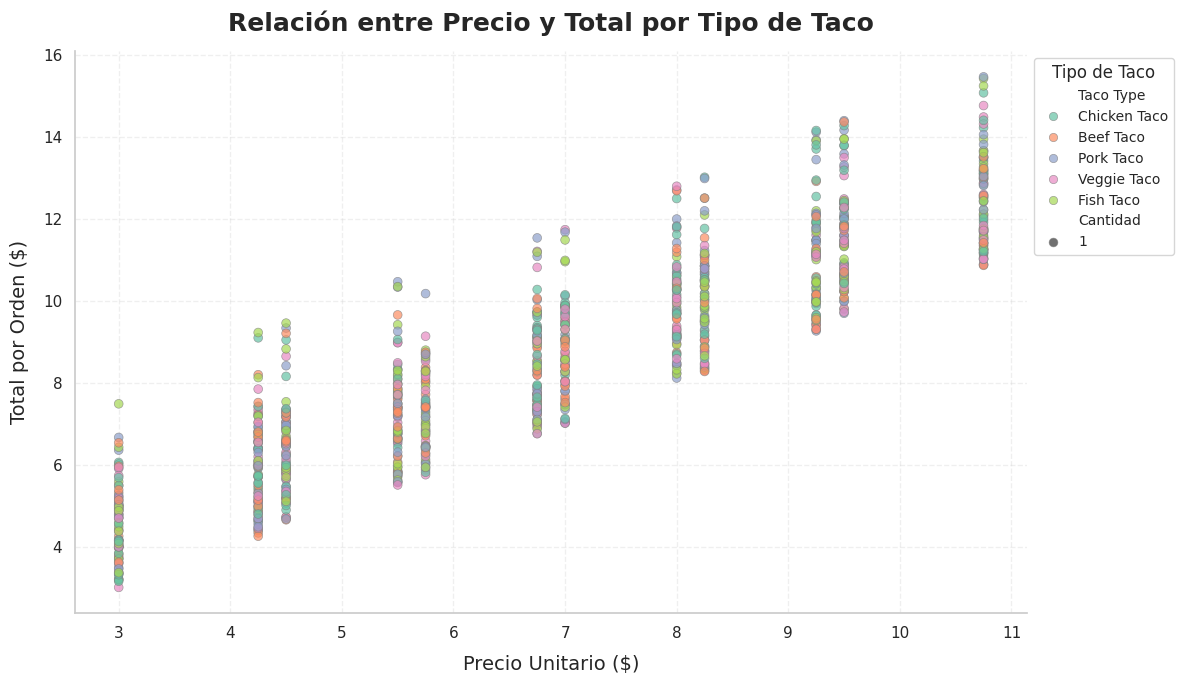

In [75]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))

scatter = sns.scatterplot(
    data=df,
    x="Price ($)",
    y="Total",
    hue="Taco Type",
    size="Cantidad",
    sizes=(40, 250),
    alpha=0.7,
    palette="Set2",
    edgecolor="gray",
    linewidth=0.5
)

plt.title("Relación entre Precio y Total por Tipo de Taco", fontsize=18, fontweight='bold', pad=15)
plt.xlabel("Precio Unitario ($)", fontsize=14, labelpad=10)
plt.ylabel("Total por Orden ($)", fontsize=14, labelpad=10)


plt.legend(title="Tipo de Taco", title_fontsize=12, fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True, linestyle='--', alpha=0.3)

sns.despine()


plt.tight_layout()
plt.show()



In [76]:
corr = df['Price ($)'].corr(df['Total'])
print(f"Correlación entre Precio y Total: {corr:.2f}")

group_stats = df.groupby("Taco Type")[["Price ($)", "Total"]].agg(["mean", "median", "std", "min", "max"])
print(group_stats)


Correlación entre Precio y Total: 0.90
             Price ($)                                  Total         \
                  mean median       std  min    max      mean median   
Taco Type                                                              
Beef Taco     6.581044   6.75  2.209181  3.0  10.75  8.283407  8.070   
Chicken Taco  7.125000   7.00  2.373923  3.0  10.75  9.015550  9.325   
Fish Taco     6.888626   6.75  2.359891  3.0  10.75  8.685450  8.560   
Pork Taco     7.015625   7.00  2.352122  3.0  10.75  8.902344  9.085   
Veggie Taco   6.887056   6.75  2.220957  3.0  10.75  8.626954  8.530   

                                     
                   std   min    max  
Taco Type                            
Beef Taco     2.353986  3.62  14.37  
Chicken Taco  2.756182  3.16  15.08  
Fish Taco     2.648282  3.19  15.43  
Pork Taco     2.783512  3.21  15.47  
Veggie Taco   2.531171  3.01  14.77  


#### Conclusion

El grafico muestra una relacion positiva moderada entre el precio unitario de cada taco con respecto al total por orden, dando a entender que al aumentar el precio del taco aumenta de manera lineal el precio de la orden.

En el caso del Chicken Taco y el Pork Taco, el precio genera montons mas elevados.

El gráfico permite ver cómo el precio, la cantidad y el tipo de taco se combinan para influir en el total de la orden, mostrando patrones consistentes con la lógica de ventas en un restaurante.




## Gráfico: Matriz de correlación entre Precio, Propina y Total


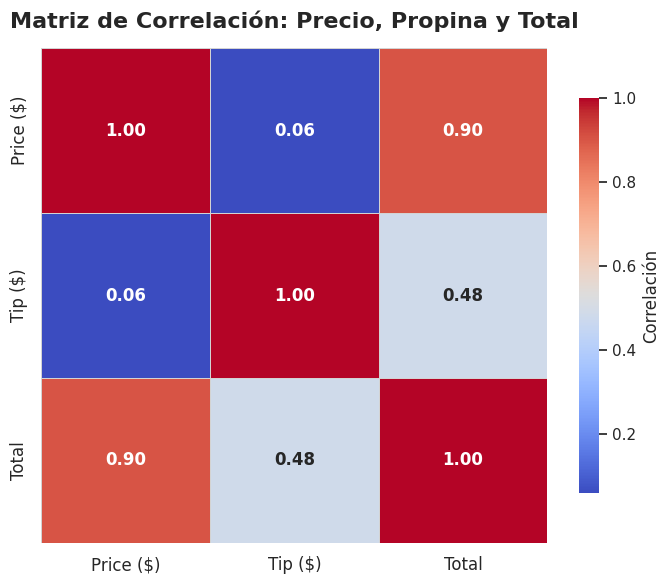

In [92]:
df["Price ($)"] = pd.to_numeric(df["Price ($)"], errors="coerce")
df["Tip ($)"] = pd.to_numeric(df["Tip ($)"], errors="coerce")
df["Total"] = pd.to_numeric(df["Total"], errors="coerce")

sns.set_theme(style="white")

plt.figure(figsize=(7, 6))
sns.heatmap(
    df[["Price ($)", "Tip ($)", "Total"]].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    linecolor='lightgray',
    annot_kws={"size": 12, "weight": "bold"},
    cbar_kws={"shrink": 0.8, "label": "Correlación"}
)
plt.title("Matriz de Correlación: Precio, Propina y Total", fontsize=16, fontweight='bold', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [91]:
df[["Price ($)", "Tip ($)", "Total"]].corr().round(2)

,Price ($),Tip ($),Total
Price ($),1.00,0.06,0.90
Tip ($),0.06,1.00,0.48
Total,0.90,0.48,1.00


#### Conclusion

Se observa una correlación muy fuerte entre el precio y el total (0.90), lo cual tiene sentido ya que el precio representa la mayor parte del monto final.
La propina también se relaciona positivamente con el total (0.48), aunque en menor medida.
En cambio, no hay relación significativa entre el precio y la propina (0.06), lo que sugiere que el monto de la propina no depende del precio del taco.

# Graficos Multivariados

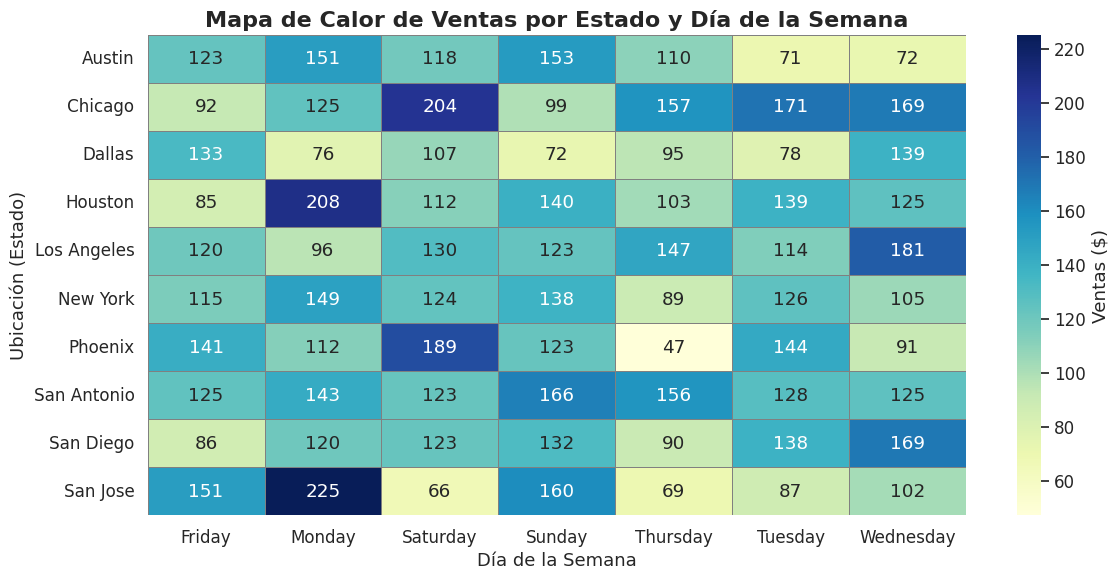

In [77]:
pivot = df.pivot_table(values="Total", index="Location", columns="Día de Semana", aggfunc="sum")


sns.set(style="whitegrid", font_scale=1.1)


plt.figure(figsize=(12, 6))


sns.heatmap(
    pivot,
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor='gray',
    annot=True,
    fmt=".0f",
    cbar_kws={'label': 'Ventas ($)'},
    square=False
)


plt.title("Mapa de Calor de Ventas por Estado y Día de la Semana", fontsize=16, fontweight='bold')
plt.xlabel("Día de la Semana", fontsize=13)
plt.ylabel("Ubicación (Estado)", fontsize=13)

plt.tight_layout()

plt.show()
